# Statistikk i Python 3 

Nå ønsker vi å undersøke konfidensintervaller litt nærmere. <br>
Den enkleste måten å beskrive et konfidensintervall er med et eksempel:
Du ønsker å si noe om den gjennomsnittlig IQ scoren til den norske befolkningen. <br> Du kan ikke si noe om det sanne gjennomsnittet, fordi du ikke kan sjekke IQ'en til hele befolkningen. Men det du kan si noe om, er sannsynligheten for at det sanne gjennomsnittet ligger i nærheten av ditt populasjons-gjennomsnitt med et lite intervall.

NB. Et konfidensintervall trenger ikke å høre eksklusivt til et gjennomsnitt. Du kan finne et konfidensintervall til et standard avvik, eller punkter på en regresjonslinje, som vi gjorde i $\textbf{Statistikk i Python 2}$

## Konfidensintervaller1.py 

I dette programmet skal igjen utføre "målinger". Dvs. trekke n tilfeldige tall fra en normalfordeling med gjennomsnitt 10, og standardavvik 1. Deretter skal vi finne gjennomsnittet, og konfidensintervallet. <br> 

Vi skal bruke noe som kalles for standard normal fordelingen (a.k.a. z fordelingen). Det er en normalfordeling med $\mu = 0$ og $\sigma = 1$.
Man kan vise at $68\%$ av observert data ligger innenfor ett standardavvik, samt at $95\%$ ligger innenfor to standardavvik, og at $99\%$ innenfor tre standardavvik (se bilde under). <br>

Når man bestemmer $\textbf{dekningsgrad}$ så bruker man ofte $95\%$. Da er det $95\%$ sikkert at det sanne gjennomsnittet ligger innenfor konfidensintervallet vi ender opp med. Med den informasjonen, kan man finne en tabellert z-score. I tilfellet med $95\%$ dekningsgrad, vil z-scoren være $\textbf{1.96}$, fordi $95\%$ av målingene ligger innenfor 1.96 standardavvik i standard normal fordelingen. 


Nå kan vi, på samme måte som i statistikk i Python 2, bruke standarderror SE, for å finne øvre og nedre grense i konfidensintervallet:

$$\bar{x} \pm z \cdot \frac{\textit{STD(R)}}{\sqrt n} \rightarrow \bar{x}  \pm z \cdot SE(R).$$



<div>
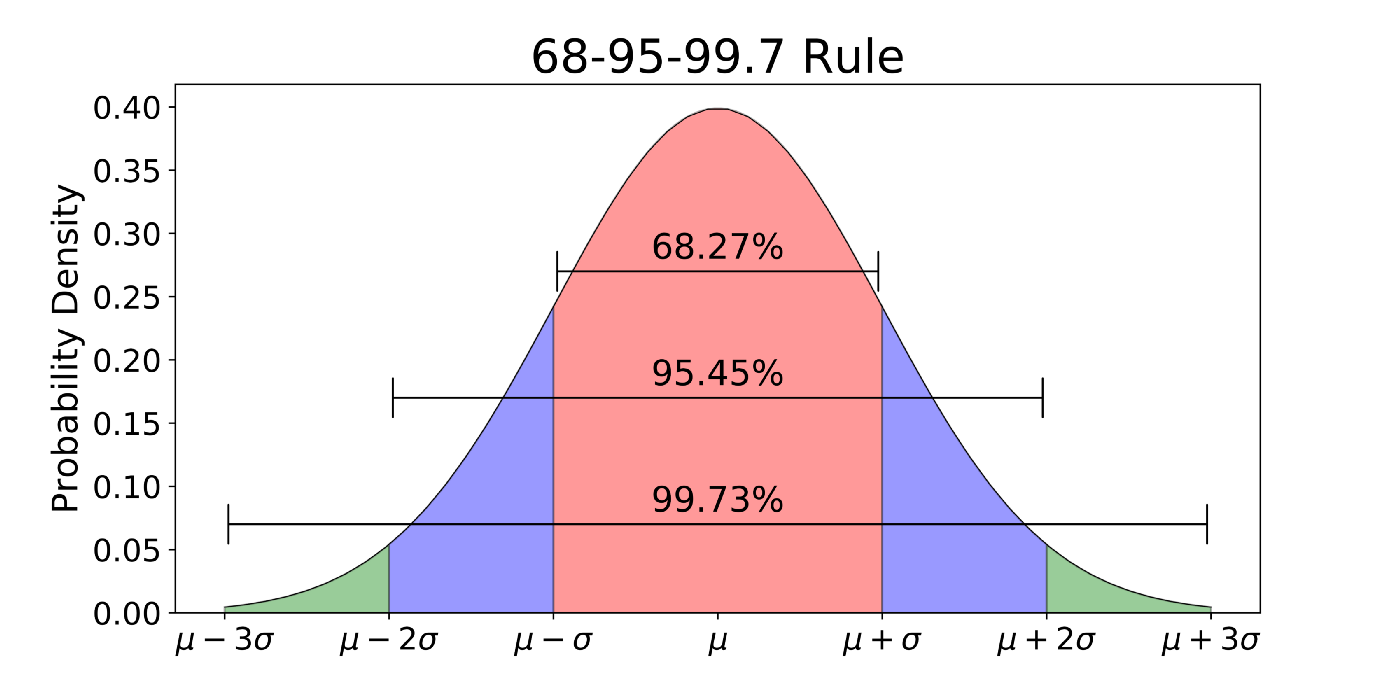
</div>

In [2]:
import numpy as np
def confidence_generator(N,print_=False):

    #Simulerer normalfordelte data med forventningsverdi 10 og standardavvik 1
    sigma = 1
    X = 10
    norm = sigma * np.random.randn(N) + X
    xMean = np.mean(norm)
    mean_stderr = np.std(norm)/np.sqrt(N) #finner standard feil i gjennomsnittet

    """
    Finner lavre og øvre grense for konfidensintervallet, med en 95% sannsynlighet
    for at gjennomsnittet ligger innenfor konfidensintervallet.
    Derfor multipliserer vi standard feilen med 1.96.
    Se mer om konfidensintervaller i kompendiet.
    """
    lower_ci = xMean - 1.96 * mean_stderr
    upper_ci = xMean + 1.96 * mean_stderr
    if print_ == True:
        print("\n For N = {}".format(N))
        print("xMean = {:.4}".format(xMean))
        print("Konfidensintervallet er mellom [{:.4},{:.4}]".format(lower_ci,upper_ci))
    return lower_ci,upper_ci,xMean


confidence_generator(10,True)


 For N = 10
xMean = 10.41
Konfidensintervallet er mellom [9.808,11.01]


(9.807668693278718, 11.010488197092716, 10.409078445185717)

Nå ønsker vi å verifisere at standardavviket stemmer, ved å sjekke om det sanne gjennomsnittet $10$ ligger innenfor konfidensintervallet $95\%$ av gangene.
Ved å utføre "eksperimenter", dvs. at vi repeterer prosessen med å hente ut n målinger fra normalfordelingen x ganger. For hvert eksperiment, er vi nødt til å lage et konfidensintervall, og undersøke om det sanne gjennomsnittet 10, ligger innenfor dette konfidensintervallet. 

In [7]:
n = 10  #antall vi trekker fra normalfordelingen
reps = 5000  #antall utførte eksperimenter
sum = 0  
for i in range(reps):
    #henter ut et konfidensintervall
    lower_ci_sim , upper_ci_sim,_ = confidence_generator(n) 
    #sjekker om 10 ligger innenfor konfidensintervallet
    if lower_ci_sim <= 10 <= upper_ci_sim: 
        sum += 1
print("\n {}% av gangene, er gjennomsnittet innenfor konfidensintervallet".format(sum/reps*100))


 90.96% av gangene, er gjennomsnittet innenfor konfidensintervallet


Her ser vi at 10 bare er innenfor det genererte konfidensintervallet $\approx 91 \%$ av gangene.

Årsaken til det er at en svært viktig antakelse bryter sammen:

Når vi bruker z-fordelingen, så anntar man at man kjenner $\sigma$. $\sigma$ trenger man for å finne øvre og nedre grense i konfidensintervallet:

$$\bar{x} \pm z \cdot \frac{\sigma}{\sqrt{n}}.$$
Vi anntar at vi kan tilnærme $\sigma$ med standardavviket til målingene STD(R), men den antakelsen er bare sann for tilstrekkelig målinger. Dvs. n er stor nok. 

Vi kan prøve å øke n til 100, og ser hva som skjer.

In [46]:
sum = 0
n = 100
for i in range(reps):
    lower_ci_sim , upper_ci_sim,_ = confidence_generator(n)
    if lower_ci_sim <= 10 <= upper_ci_sim:
        sum += 1
print("\n {}% av gangene, er gjennomsnittet innenfor konfidensintervallet".format(sum/reps*100))


 94.64% av gangene, er gjennomsnittet innenfor konfidensintervallet


Det er ikke perfekt, men bedre.

## Konfidensintervaller2.py 

Vi så nå, at man kunne forbedre konfidensintervallet ved å øke antall målinger, men det er ikke alltid mulig. Da er T-fordelingen nyttig. 
I T-fordelingen er konseptet [frihetsgrader](https://www.youtube.com/watch?v=N20rl2llHno) viktig. Jo færre målinger du har, jo færre frihetsgrader har du, og du får en fordeling som på bildet under.

Ideen bak frihetsgrader er å ta høyde for antall målinger. Vi var inne på det istad: Standardavviket til målingene er bare en tilnærming til populasjonens standardavvik. Jo færre målinger du har, jo dårligere tilnærming. 
Så for å kompensere kan du redusere antall frihetsgrader. 

Et illustrerende eksempel, er n-1 leddet i formelen for standardavvik:

$$\frac{1}{n-1}\sqrt{\sum_{i=1}^{n} (x-\bar{x})^2}.$$

Grunnen til at vi deler på n-1, og ikke n, er fordi vi gjør en tilnærming til $\sigma$ fra et sett med målinger. Så for få målinger så kan vi bomme helt på det sanne standardavviket. Derfor gjør vi standardavviket større ved å dele på et mindre tall. På denne måten får vi inn en sikkerhetsmargin.   

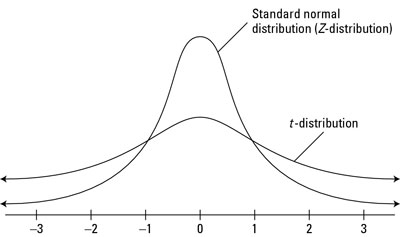

Så tilbake til T-fordelingen. Det er vanlig å velge n-1 frihetsgrader, men hvordan finner da T-scoren? Fra intuisjon kan vi si at den burde være større enn 1.96 for $95\%$ dekningsgrad. Hvis du ser på bildet over, så ser man at T-fordelingen er mer spredt ut. Derfor må du lenger ut på x aksen for at $95\%$ av målingene skal ligge innenfor. 

For å finne den verdien skal vi bruke noe som heter den $\textbf{inverse kummulative t fordelingen.}$

#### Kummulativ Sannsynlighetsfordeling
Vi kjenner til den vanlige sannsynlighetsfordelingen f(x), som gir sannsynligheten for å få x ($P(x)$). Men den kummulative sannsynlighetsfordelingen F(x) er litt annerledes. Den forteller deg sannsynligheten for å få x eller mindre ($P(X\leq x)$). 
<br>

Om du ser på figuren under, så ser du den kummulative sannsynligheten for å få $6$ på terningen er $1$. Det er fordi uansett om du får en $3$'er eller en $4$'er så tilfredsstiller de kravet om å være mindre eller lik $6$.

<div>

</div>


#### Invers Kummulativ Sannsynlighetsfordeling

Det betyr rett å slett at du switcher x og y aksen i det kummulative sannsynlighetsfordelingen. Slik at istedenfor å finne F(x), så finner du x(F). For å ta terning eksempelet:

Hvilken kummulativ sannsynlighet trenger vi for å få f.eks. terningkast $2$.

<br>

$\textbf{Nå kommer vi tilbake til T-fordelingen.}$ Fordi vi ønsker å finne ut hvilken T-score som gir $95\%$ dekningsgrad. 

Til det så bruker vi igjen stats pakken fra scipy biblioteket. Der har vi den inverse kummulative sannsynlighetsfordelingen. 

$\textbf{scipy.stats.t.ppf(q,df)}$. 

For $95\%$ dekningsgrad, så vil det være $5\%$ areal som ikke er dekt. Det representeres av de gule områdene i figuren under. 
Disse to er like, så ett gult område vil altså dekke $\frac{5}{2} = 2.5\%$. 
q verdien er $1-0.025 = 0.975$. 

DF er "degrees of freedom".







<div>
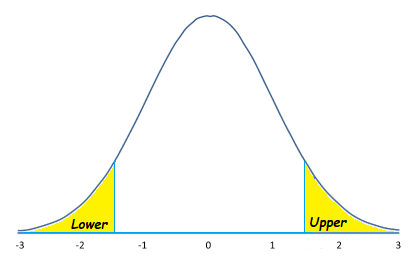
</div>

La oss nå endelig finne konfidensintervallet med T-fordelingen:

In [50]:
from scipy import stats
n = 10
sigma = 1
X = 10
#utfører målinger
norm = sigma*np.random.randn(n) + X
mean = np.mean(norm)

alpha = 0.05 #tilsvarer 95% dekningsgrad.
CI_coeff = stats.t.ppf(1-(alpha/2),n-1) #finner t-score for 95% dekningsgrad

lower_ci = mean - CI_coeff * np.std(norm)/np.sqrt(n)
upper_ci = mean + CI_coeff * np.std(norm)/np.sqrt(n)

print("Konfidensintervall med t-distribution og N = {} er [{:.2f},{:.2f}]".format(n,lower_ci,upper_ci))

Konfidensintervall med t-distribution og N = 10 er [9.50,10.76]


Intervallet ble litt større sammenlignet med z-fordelingen, men la oss verifisere at dette er et godt konfidensintervall. 
Vi gjør det samme som tidligere, og utfører eksperimenter.

In [53]:
reps = 5000
sum = 0
for i in range(reps):
    xSim = sigma*np.random.randn(n) + X
    xMean = np.mean(xSim)
    lower_ci_sim = xMean - CI_coeff * np.std(norm)/np.sqrt(n)
    upper_ci_sim = xMean + CI_coeff * np.std(norm)/np.sqrt(n)
    if lower_ci_sim <= 10 <= upper_ci_sim:
        sum += 1
print("\n {}% av gangene, er gjennomsnittet innenfor konfidensintervallet".format((sum/reps*100)))


 95.46% av gangene, er gjennomsnittet innenfor konfidensintervallet


Ja! Nå treffer vi mye bedre, med bare 10 målinger.